In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import os
import random
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)


In [5]:
df = pd.read_csv(r'C:\Users\vedan\Downloads\galaxy-zoo-the-galaxy-challenge\training_solutions_rev1/training_solutions_rev1.csv')

df_train, df_test = train_test_split(df[:30000], test_size=.2)
df_train.shape, df_test.shape

((24000, 38), (6000, 38))

In [6]:
df_train.describe()

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,...,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000
mean,319942.993417,0.430053,0.545090,0.024856,0.107069,0.438021,0.103248,0.334774,0.218665,0.219356,...,0.032505,0.092690,0.085421,0.040554,0.015394,0.095627,0.017846,0.007752,0.007231,0.074815
std,125803.641322,0.282870,0.295853,0.036477,0.213237,0.301958,0.178628,0.247533,0.286602,0.178702,...,0.097206,0.144545,0.141662,0.101287,0.052558,0.195535,0.068662,0.038266,0.037580,0.107806
min,100008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210545.750000,0.174998,0.284809,0.000000,0.000000,0.170065,0.000000,0.123872,0.000000,0.072349,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,321586.500000,0.414041,0.562801,0.014767,0.000000,0.401571,0.000000,0.292677,0.097847,0.183535,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,427483.500000,0.674767,0.812022,0.034000,0.086534,0.694886,0.135626,0.517279,0.338662,0.338531,...,0.000000,0.150169,0.130322,0.031674,0.000000,0.100322,0.000000,0.000000,0.000000,0.131300
max,540188.000000,1.000000,1.000000,0.876458,1.000000,1.000000,1.000000,1.000000,1.000000,0.925311,...,0.901991,0.949733,0.877393,0.996952,0.843726,1.000000,0.975913,0.936903,0.874575,0.655156


In [7]:
print("Shape of the train set: ",df_train.shape)

print("Shape of the test set: ",df_test.shape)

Shape of the train set:  (24000, 38)
Shape of the test set:  (6000, 38)


In [5]:
trainPath =r'C:\Users\vedan\Downloads\galaxy-zoo-the-galaxy-challenge\images_training_rev1\images_training_rev1'
testPath = r'C:\Users\vedan\Downloads\galaxy-zoo-the-galaxy-challenge\images_test_rev1\images_test_rev1'

In [6]:
def plot_random_galaxy(path, sample = 5):
    random_image=random.sample(os.listdir(path),sample)
 
    plt.figure(figsize=(16,5))
    for i in range(sample):
        
        plt.subplot(1,sample,i+1)
        img=tf.io.read_file(os.path.join(path,random_image[i]))
        img=tf.io.decode_image(img)
        plt.imshow(img)
        plt.title(f'Class: {random_image[i]}\nShape: {img.shape}')
        plt.axis(False) 

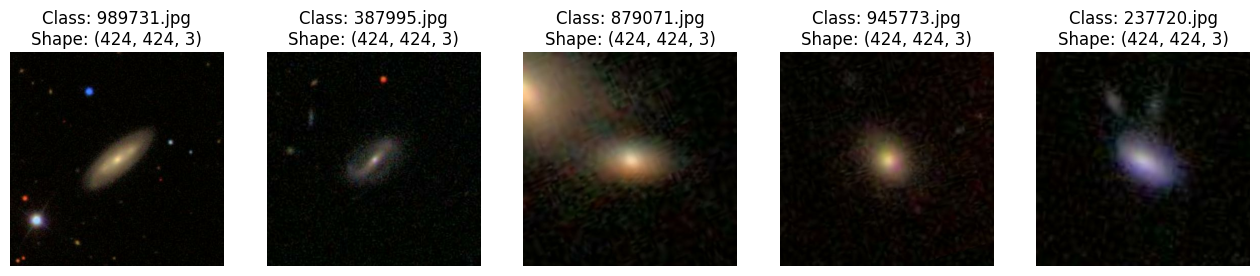

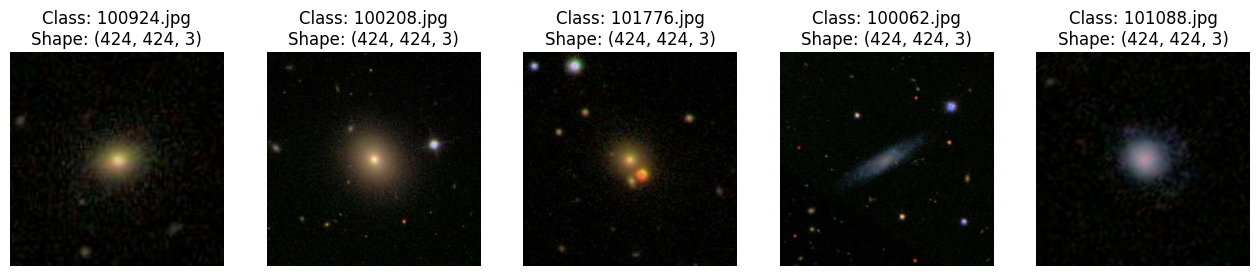

In [7]:
plot_random_galaxy(r'C:\Users\vedan\Downloads\galaxy-zoo-the-galaxy-challenge\images_training_rev1\images_training_rev1')
plot_random_galaxy(r'C:\Users\vedan\Downloads\galaxy-zoo-the-galaxy-challenge\images_test_rev1\images_test_rev1')

In [8]:
from skimage.transform import resize
from tqdm import tqdm 
import matplotlib.pyplot as plt
%matplotlib inline
          

ORIG_SHAPE = (424,424)
CROP_SIZE = (256,256)
IMG_SHAPE = (64,64)

def get_image(path, x1,y1, shape, crop_size):
    x = plt.imread(path)
    x = x[x1:x1+crop_size[0], y1:y1+crop_size[1]]
    x = resize(x, shape)
    x = x/255.
    return x
    
def get_all_images(dataframe, shape=IMG_SHAPE, crop_size=CROP_SIZE):
    x1 = (ORIG_SHAPE[0]-CROP_SIZE[0])//2
    y1 = (ORIG_SHAPE[1]-CROP_SIZE[1])//2
   
    sel = dataframe.values
    ids = sel[:,0].astype(int).astype(str)
    y_batch = sel[:,1:]
    x_batch = []
    for i in tqdm(ids):
        x = get_image(r'C:\Users\vedan\Downloads\galaxy-zoo-the-galaxy-challenge\images_training_rev1\images_training_rev1/'+i+'.jpg', x1,y1, shape=shape, crop_size=crop_size)
        x_batch.append(x)
    x_batch = np.array(x_batch)
    return x_batch, y_batch
        
X_train, y_train = get_all_images(df_train)
X_test, y_test = get_all_images(df_test)

100%|██████████████████████████████████████████████████████████████████████████████| 6000/6000 [02:11<00:00, 45.76it/s]


In [9]:
X_train.shape

(24000, 64, 64, 3)

In [10]:
df_train.values[0].shape

(38,)

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization, GlobalMaxPooling2D
from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

#to use two GPUs in parallel
strategy = tf.distribute.MirroredStrategy()

with strategy.scope():
    model = Sequential()
    model.add(Conv2D(512, (3, 3), input_shape=(IMG_SHAPE[0], IMG_SHAPE[1], 3)))
    model.add(Conv2D(256, (3, 3)))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3)))
    model.add(Conv2D(128, (3, 3)))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3)))
    model.add(Conv2D(128, (3, 3)))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(GlobalMaxPooling2D())


    model.add(Dropout(0.25))
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(Dense(37))
    model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy',root_mean_squared_error])

model.summary()

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 512)       14336     
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 256)       1179904   
                                                                 
 activation (Activation)     (None, 60, 60, 256)       0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 256)       0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 256)       590080    
                                                                 
 conv2d_3 (Conv2D

In [ ]:
batch_size = 128 
with strategy.scope():
    model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test),use_multiprocessing=True)

Epoch 1/10
363/750 [=============>................] - ETA: 32:42 - loss: 0.3389 - accuracy: 0.5197 - root_mean_squared_error: 0.1919

In [16]:
import os
from tqdm import tqdm
batch_size = 1
def test_image_generator(ids, shape=IMG_SHAPE):
    x1 = (ORIG_SHAPE[0]-CROP_SIZE[0])//2
    y1 = (ORIG_SHAPE[1]-CROP_SIZE[1])//2
    x_batch = []
    for i in ids:
        x = get_image(r'C:\Users\vedan\Downloads\galaxy-zoo-the-galaxy-challenge\images_test_rev1\images_test_rev1/'+i, x1, y1, shape=IMG_SHAPE, crop_size=CROP_SIZE)
        x_batch.append(x)
    x_batch = np.array(x_batch)
    return x_batch

val_files = os.listdir(r'C:\Users\vedan\Downloads\galaxy-zoo-the-galaxy-challenge\images_test_rev1\images_test_rev1/')
val_files = val_files[:1000]
val_predictions = []
N_val = len(val_files)
for i in tqdm(np.arange(0, N_val, batch_size)):
    if i+batch_size > N_val:
        upper = N_val
    else:
        upper = i+batch_size
    X = test_image_generator(val_files[i:upper])
    y_pred = model.predict(X, verbose=0)
    val_predictions.append(y_pred)
val_predictions = np.array(val_predictions)
Y_pred = np.vstack(val_predictions)
ids = np.array([v.split('.')[0] for v in val_files]).reshape(len(val_files),1)
submission_df = pd.DataFrame(np.hstack((ids, Y_pred)), columns=df.columns)
submission_df = submission_df.sort_values(by=['GalaxyID'])
submission_df.to_csv('sample_submission.csv', index=False)

100%|████████████████████████████████████████████████████████████████████████████████| 162/162 [00:31<00:00,  5.09it/s]


In [17]:
submission_df[:10]

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100018,0.43705532,0.54244846,0.03599415,0.12851377,0.4329153,0.11504428,0.35358799,0.23247507,0.23705141,...,0.04631734,0.112933606,0.09982576,0.053225655,0.024072623,0.10673146,0.027272504,0.015715197,0.017143568,0.090900145
1,100037,0.43736148,0.542356,0.036707252,0.12979557,0.4334215,0.11634782,0.35457152,0.23385318,0.23827548,...,0.047179475,0.11425772,0.101079464,0.054148506,0.024621028,0.10799895,0.02788141,0.016126545,0.017577706,0.09209142
2,100042,0.43749604,0.5422878,0.037017982,0.13036227,0.43360162,0.11691217,0.35498112,0.23442653,0.23880361,...,0.047548357,0.11481735,0.10161859,0.05454653,0.024860218,0.10853939,0.02814608,0.016306112,0.017766396,0.09262005
3,100052,0.4372538,0.54239196,0.036450554,0.12932603,0.43324593,0.11588746,0.35423094,0.23336898,0.23783001,...,0.04686937,0.1137777,0.10062664,0.053813845,0.024424022,0.107544,0.027661363,0.015979953,0.017419888,0.09166274
4,100056,0.43745652,0.5423131,0.03692324,0.13018082,0.43356276,0.11674867,0.35487193,0.23427032,0.23864077,...,0.04743772,0.11464552,0.101458095,0.054424673,0.024786578,0.108378716,0.028063186,0.016253093,0.017707672,0.09245494
5,100058,0.43768498,0.5422238,0.037471816,0.13116026,0.43391216,0.11773421,0.35558584,0.23528674,0.23956756,...,0.048096295,0.11564794,0.1024065,0.05512822,0.025208745,0.109333836,0.028531592,0.01656885,0.018042793,0.09336997
6,100062,0.43767482,0.54223216,0.037446924,0.13112275,0.43389216,0.117693864,0.355548,0.23523837,0.23953064,...,0.04806553,0.11559965,0.10236489,0.055098,0.025189063,0.109291494,0.028511921,0.016556049,0.018028306,0.093331665
7,100065,0.43631995,0.54277414,0.03437,0.12548363,0.43186077,0.11205373,0.35133058,0.2293142,0.23421055,...,0.04437652,0.109907225,0.096949235,0.05110328,0.02283431,0.10386308,0.025893355,0.01479916,0.016167505,0.08812235
8,100071,0.4371753,0.54241365,0.036271617,0.12900332,0.43312055,0.11555671,0.35398555,0.23301907,0.23751819,...,0.046653915,0.113447994,0.100311585,0.05358036,0.024286848,0.10722785,0.027507948,0.015874797,0.01731015,0.09135944
9,100076,0.4376675,0.5422254,0.037430122,0.13107762,0.4338837,0.11766146,0.35553336,0.23521528,0.23949587,...,0.048043665,0.115567006,0.1023295,0.05507245,0.025175758,0.109253645,0.028496984,0.01654364,0.018017504,0.09329919


In [18]:
labels = submission_df.columns

In [19]:
labels[1:]

Index(['Class1.1', 'Class1.2', 'Class1.3', 'Class2.1', 'Class2.2', 'Class3.1',
       'Class3.2', 'Class4.1', 'Class4.2', 'Class5.1', 'Class5.2', 'Class5.3',
       'Class5.4', 'Class6.1', 'Class6.2', 'Class7.1', 'Class7.2', 'Class7.3',
       'Class8.1', 'Class8.2', 'Class8.3', 'Class8.4', 'Class8.5', 'Class8.6',
       'Class8.7', 'Class9.1', 'Class9.2', 'Class9.3', 'Class10.1',
       'Class10.2', 'Class10.3', 'Class11.1', 'Class11.2', 'Class11.3',
       'Class11.4', 'Class11.5', 'Class11.6'],
      dtype='object')

In [20]:
pairs = list(zip(labels[1:], range(len(labels[1:]))))

labels_dict = dict(pairs)

In [21]:
labels_dict

{'Class1.1': 0,
 'Class1.2': 1,
 'Class1.3': 2,
 'Class2.1': 3,
 'Class2.2': 4,
 'Class3.1': 5,
 'Class3.2': 6,
 'Class4.1': 7,
 'Class4.2': 8,
 'Class5.1': 9,
 'Class5.2': 10,
 'Class5.3': 11,
 'Class5.4': 12,
 'Class6.1': 13,
 'Class6.2': 14,
 'Class7.1': 15,
 'Class7.2': 16,
 'Class7.3': 17,
 'Class8.1': 18,
 'Class8.2': 19,
 'Class8.3': 20,
 'Class8.4': 21,
 'Class8.5': 22,
 'Class8.6': 23,
 'Class8.7': 24,
 'Class9.1': 25,
 'Class9.2': 26,
 'Class9.3': 27,
 'Class10.1': 28,
 'Class10.2': 29,
 'Class10.3': 30,
 'Class11.1': 31,
 'Class11.2': 32,
 'Class11.3': 33,
 'Class11.4': 34,
 'Class11.5': 35,
 'Class11.6': 36}

In [30]:
print(sub_df.dtypes)

GalaxyID      int32
Class1.1     object
Class1.2     object
Class1.3     object
Class2.1     object
Class2.2     object
Class3.1     object
Class3.2     object
Class4.1     object
Class4.2     object
Class5.1     object
Class5.2     object
Class5.3     object
Class5.4     object
Class6.1     object
Class6.2     object
Class7.1     object
Class7.2     object
Class7.3     object
Class8.1     object
Class8.2     object
Class8.3     object
Class8.4     object
Class8.5     object
Class8.6     object
Class8.7     object
Class9.1     object
Class9.2     object
Class9.3     object
Class10.1    object
Class10.2    object
Class10.3    object
Class11.1    object
Class11.2    object
Class11.3    object
Class11.4    object
Class11.5    object
Class11.6    object
dtype: object


In [36]:
numeric_columns = sub_df.select_dtypes(include=['float', 'int']).columns
sub_labels = sub_df[numeric_columns].idxmax(axis=1)


In [40]:
# Convert all columns to numeric types
sub_df = sub_df.apply(pd.to_numeric, errors='coerce')

# Find the column with the maximum value for each row
numeric_columns = sub_df.select_dtypes(include=['float', 'int']).columns
sub_labels = sub_df[numeric_columns].idxmax(axis=1)

# If you have non-numeric columns that you want to keep in the result
non_numeric_columns = sub_df.columns.difference(numeric_columns)

# Create a new DataFrame for non-numeric columns and concatenate with sub_labels
non_numeric_df = sub_df[non_numeric_columns]
result_df = pd.concat([sub_labels, non_numeric_df], axis=1)




In [41]:
sub_labels.describe()


count          162
unique           1
top       GalaxyID
freq           162
dtype: object

In [42]:
labels_dict

{'Class1.1': 0,
 'Class1.2': 1,
 'Class1.3': 2,
 'Class2.1': 3,
 'Class2.2': 4,
 'Class3.1': 5,
 'Class3.2': 6,
 'Class4.1': 7,
 'Class4.2': 8,
 'Class5.1': 9,
 'Class5.2': 10,
 'Class5.3': 11,
 'Class5.4': 12,
 'Class6.1': 13,
 'Class6.2': 14,
 'Class7.1': 15,
 'Class7.2': 16,
 'Class7.3': 17,
 'Class8.1': 18,
 'Class8.2': 19,
 'Class8.3': 20,
 'Class8.4': 21,
 'Class8.5': 22,
 'Class8.6': 23,
 'Class8.7': 24,
 'Class9.1': 25,
 'Class9.2': 26,
 'Class9.3': 27,
 'Class10.1': 28,
 'Class10.2': 29,
 'Class10.3': 30,
 'Class11.1': 31,
 'Class11.2': 32,
 'Class11.3': 33,
 'Class11.4': 34,
 'Class11.5': 35,
 'Class11.6': 36}

In [46]:
# Exclude 'GalaxyID' from sub_labels
sub_labels_without_id = sub_labels[sub_labels != 'GalaxyID']

# Use the modified sub_labels to access labels_dict
pred_class = [labels_dict[label] for label in sub_labels_without_id]


In [48]:
# Check if 'GalaxyID' is in labels_dict
if 'GalaxyID' in labels_dict:
    pred_class = [labels_dict[label] for label in sub_labels]
else:
    print("'GalaxyID' not found in labels_dict")


'GalaxyID' not found in labels_dict


In [49]:
print("Length of pred_class:", len(pred_class))
print("Number of rows in sub_df:", len(sub_df))


Length of pred_class: 0
Number of rows in sub_df: 162


In [55]:
print("Length of pred_class:", len(pred_class))
print(sub_df.index)



Length of pred_class: 0
RangeIndex(start=0, stop=162, step=1)


In [54]:
sub_df


,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100018,0.437055,0.542448,0.035994,0.128514,0.432915,0.115044,0.353588,0.232475,0.237051,...,0.046317,0.112934,0.099826,0.053226,0.024073,0.106731,0.027273,0.015715,0.017144,0.090900
1,100037,0.437361,0.542356,0.036707,0.129796,0.433422,0.116348,0.354572,0.233853,0.238275,...,0.047179,0.114258,0.101079,0.054149,0.024621,0.107999,0.027881,0.016127,0.017578,0.092091
2,100042,0.437496,0.542288,0.037018,0.130362,0.433602,0.116912,0.354981,0.234427,0.238804,...,0.047548,0.114817,0.101619,0.054547,0.024860,0.108539,0.028146,0.016306,0.017766,0.092620
3,100052,0.437254,0.542392,0.036451,0.129326,0.433246,0.115887,0.354231,0.233369,0.237830,...,0.046869,0.113778,0.100627,0.053814,0.024424,0.107544,0.027661,0.015980,0.017420,0.091663
4,100056,0.437457,0.542313,0.036923,0.130181,0.433563,0.116749,0.354872,0.234270,0.238641,...,0.047438,0.114646,0.101458,0.054425,0.024787,0.108379,0.028063,0.016253,0.017708,0.092455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,102145,0.437018,0.542482,0.035902,0.128331,0.432870,0.114888,0.353470,0.232314,0.236891,...,0.046207,0.112761,0.099660,0.053100,0.024003,0.106578,0.027194,0.015666,0.017088,0.090739
158,102151,0.437274,0.542371,0.036487,0.129406,0.433249,0.115945,0.354266,0.233425,0.237895,...,0.046910,0.113846,0.100693,0.053861,0.024452,0.107607,0.027693,0.015998,0.017443,0.091728
159,102152,0.437283,0.542374,0.036502,0.129438,0.433264,0.115974,0.354283,0.233458,0.237929,...,0.046928,0.113874,0.100721,0.053882,0.024464,0.107635,0.027706,0.016008,0.017452,0.091752
160,102175,0.437576,0.542260,0.037203,0.130693,0.433737,0.117250,0.355238,0.234786,0.239119,...,0.047771,0.115156,0.101944,0.054787,0.025002,0.108865,0.028304,0.016414,0.017879,0.092927


In [56]:
predictions = sub_df.copy()

In [58]:
print(predictions.columns)


Index(['GalaxyID', 'Class1.1', 'Class1.2', 'Class1.3', 'Class2.1', 'Class2.2',
       'Class3.1', 'Class3.2', 'Class4.1', 'Class4.2', 'Class5.1', 'Class5.2',
       'Class5.3', 'Class5.4', 'Class6.1', 'Class6.2', 'Class7.1', 'Class7.2',
       'Class7.3', 'Class8.1', 'Class8.2', 'Class8.3', 'Class8.4', 'Class8.5',
       'Class8.6', 'Class8.7', 'Class9.1', 'Class9.2', 'Class9.3', 'Class10.1',
       'Class10.2', 'Class10.3', 'Class11.1', 'Class11.2', 'Class11.3',
       'Class11.4', 'Class11.5', 'Class11.6'],
      dtype='object')


In [63]:
predictions = predictions.loc[:,['GalaxyID']]

In [64]:
predictions

,GalaxyID
0,100018
1,100037
2,100042
3,100052
4,100056
...,...
157,102145
158,102151
159,102152
160,102175


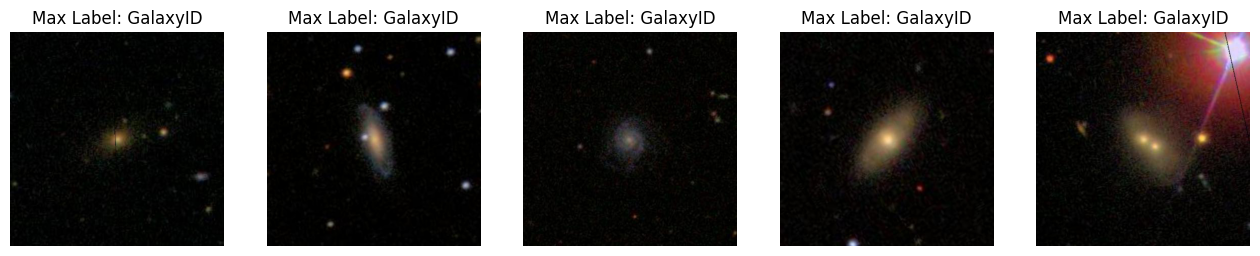

In [94]:
import matplotlib.pyplot as plt
import random

# Visualization: Plot a few random galaxies
def plot_random_galaxies(df, column_name, sample=5, image_path=r'C:\Users\vedan\Downloads\galaxy-zoo-the-galaxy-challenge\images_training_rev1\images_training_rev1'):
    random_rows = random.sample(range(len(df)), sample)

    plt.figure(figsize=(16, 5))
    for i, row_index in enumerate(random_rows, 1):
        plt.subplot(1, sample, i)
        galaxy_id = df.iloc[row_index]['GalaxyID']
        img_path = f"{image_path}/{galaxy_id}.jpg"
        img = plt.imread(img_path)
        plt.imshow(img)
        plt.title(f'Max Label: {df.iloc[row_index][column_name]}')
        plt.axis(False)

# Plot random galaxies along with the MaxLabelColumn
plot_random_galaxies(result_df, 'MaxLabelColumn')
plt.show()


Image Path: C:\Users\vedan\Downloads\galaxy-zoo-the-galaxy-challenge\images_test_rev1\images_test_rev1/101088.jpg
Image Shape: (424, 424, 3)
Image Path: C:\Users\vedan\Downloads\galaxy-zoo-the-galaxy-challenge\images_test_rev1\images_test_rev1/100987.jpg
Image Shape: (424, 424, 3)
Image Path: C:\Users\vedan\Downloads\galaxy-zoo-the-galaxy-challenge\images_test_rev1\images_test_rev1/101401.jpg
Image Shape: (424, 424, 3)
Image Path: C:\Users\vedan\Downloads\galaxy-zoo-the-galaxy-challenge\images_test_rev1\images_test_rev1/100893.jpg
Image Shape: (424, 424, 3)
Image Path: C:\Users\vedan\Downloads\galaxy-zoo-the-galaxy-challenge\images_test_rev1\images_test_rev1/101117.jpg
Image Shape: (424, 424, 3)


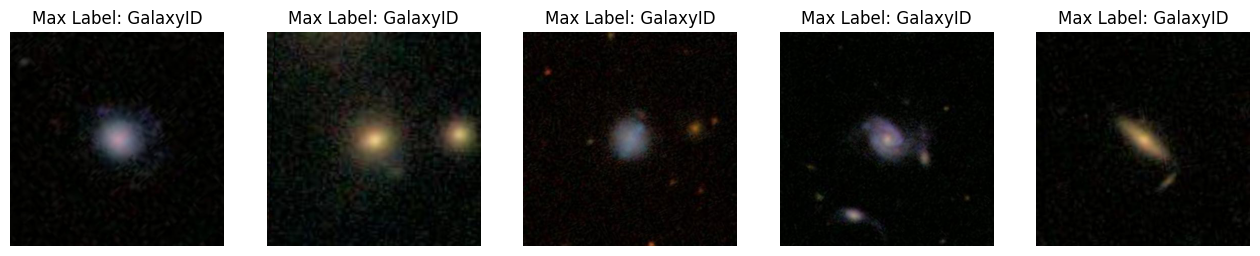

In [77]:
import matplotlib.pyplot as plt
import random

# Visualization: Plot a few random galaxies
def plot_random_galaxies(df, column_name, sample=5, image_path=r'C:\Users\vedan\Downloads\galaxy-zoo-the-galaxy-challenge\images_test_rev1\images_test_rev\images_training_rev1'):
    random_rows = random.sample(range(len(df)), sample)

    plt.figure(figsize=(16, 5))
    for i, row_index in enumerate(random_rows, 1):
        plt.subplot(1, sample, i)
        galaxy_id = df.iloc[row_index]['GalaxyID']
        img_path = f"{image_path}/{galaxy_id}.jpg"
        img = plt.imread(img_path)
        plt.imshow(img)
        plt.title(f'Max Label: {df.iloc[row_index][column_name]}')
        plt.axis(False)

# Plot random galaxies along with the MaxLabelColumn
plot_random_galaxies(result_df, 'MaxLabelColumn')
plt.show()

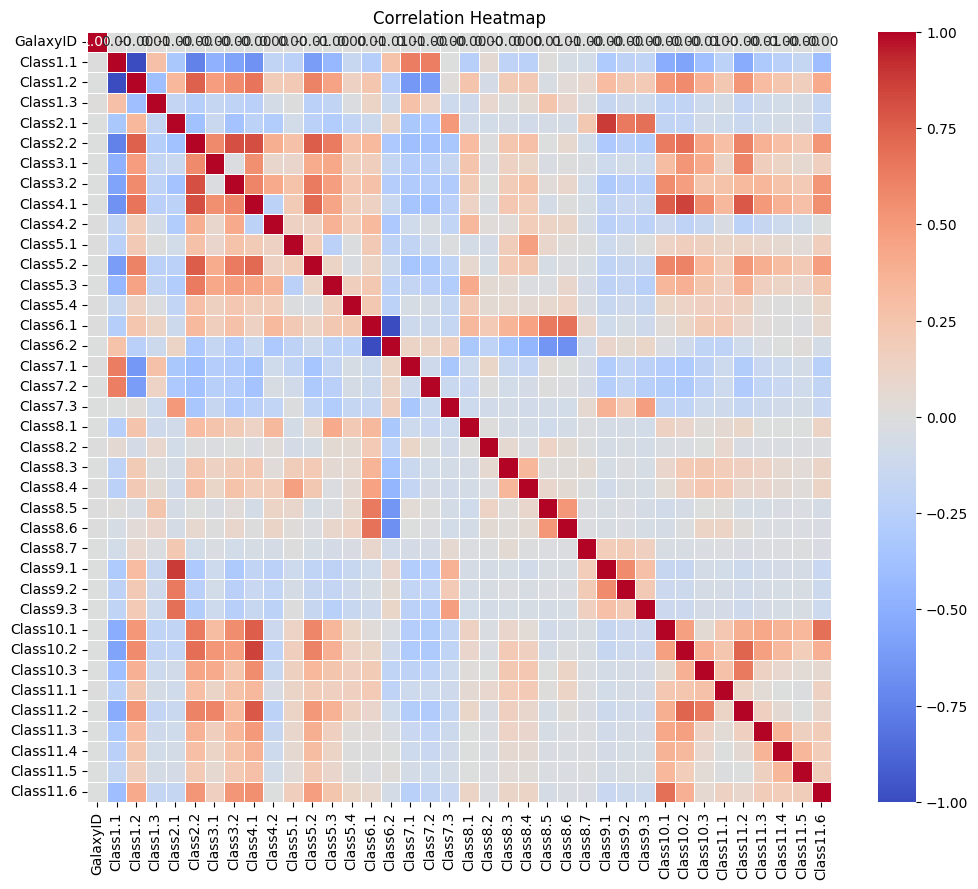

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
csv_path = r'C:\Users\vedan\Downloads\galaxy-zoo-the-galaxy-challenge\training_solutions_rev1\training_solutions_rev1.csv'
df = pd.read_csv(csv_path)

# Convert all columns to numeric types
df = df.apply(pd.to_numeric, errors='coerce')

# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


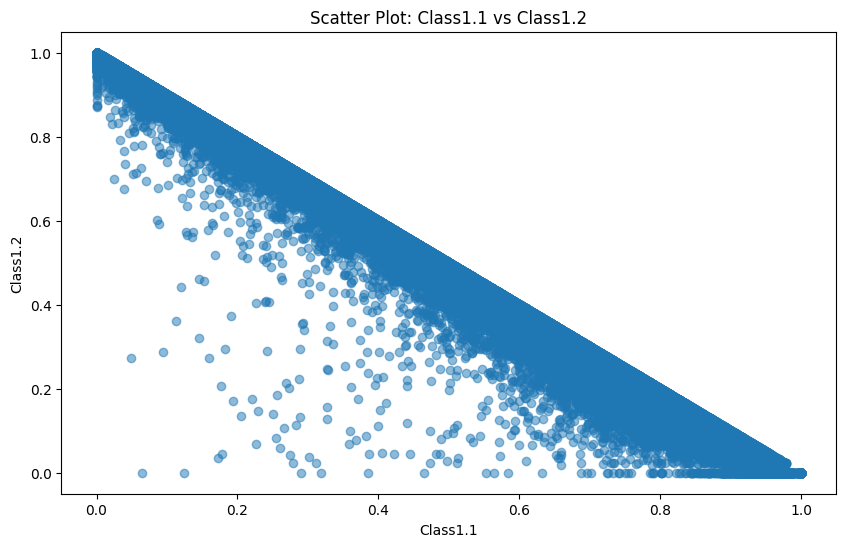

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
csv_path = r'C:\Users\vedan\Downloads\galaxy-zoo-the-galaxy-challenge\training_solutions_rev1\training_solutions_rev1.csv'
df = pd.read_csv(csv_path)

# Choose two columns for the scatter plot (adjust these based on your columns of interest)
x_column = 'Class1.1'
y_column = 'Class1.2'

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df[x_column], df[y_column], alpha=0.5)
plt.title(f'Scatter Plot: {x_column} vs {y_column}')
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.show()

In [105]:
from sklearn.metrics import accuracy_score

# Assuming y_true is the true labels and y_pred is the predicted labels
y_true = [0, 1, 1, 0, 1, 1, 0, 1, 0, 0]
y_pred = [0, 1, 0, 0, 1, 1, 1, 1, 0, 1]

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 70.00%
